In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

mouse_metadata_path = ("data/Mouse_metadata.csv")
study_results_path = ("data/Study_results.csv")

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_study_raw = pd.merge(study_results, mouse_metadata, on = "Mouse ID")
mouse_study_raw

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
unique_mice_raw = mouse_study_raw["Mouse ID"].unique() #used to check number of mice ID not used in other code
print(f"There are {len(unique_mice_raw)} unique Mice IDs in the raw data.")

duplicated_mice = mouse_study_raw.loc[mouse_study_raw.duplicated(subset = ["Mouse ID", "Timepoint"])]
dup_mouse = duplicated_mice["Mouse ID"].unique()[0]

# Works but look into if there is a way to not hard code the slice here
dup_mouse_data = mouse_study_raw.loc[mouse_study_raw["Mouse ID"] == dup_mouse]
dup_mouse_data

There are 249 unique Mice IDs in the raw data.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Creates new dataframe without the duplicated mouse
clean_mouse_study = mouse_study_raw.loc[mouse_study_raw["Mouse ID"] != dup_mouse]

unique_mice_clean = clean_mouse_study["Mouse ID"].unique()
print(f"There are {len(unique_mice_clean)} unique mice in the cleaned data")
clean_mouse_study

There are 248 unique mice in the cleaned data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
mouse_study_by_drug = clean_mouse_study[["Tumor Volume (mm3)", "Drug Regimen"]]
mouse_study_by_drug = mouse_study_by_drug.groupby(["Drug Regimen"])

In [6]:
tumor_vol_mean = mouse_study_by_drug ["Tumor Volume (mm3)"].mean()
tumor_vol_median = mouse_study_by_drug ["Tumor Volume (mm3)"].median()
tumor_vol_var = mouse_study_by_drug ["Tumor Volume (mm3)"].var()
tumor_vol_stdD = mouse_study_by_drug ["Tumor Volume (mm3)"].std()
tumor_vol_stdE = mouse_study_by_drug["Tumor Volume (mm3)"].sem()

mouse_study_by_drug_summary = pd.DataFrame({
    "Mean Tumor Volume" : tumor_vol_mean,
    "Median Tumor Volume" : tumor_vol_median,
    "Tumor Volum Variance" : tumor_vol_var,
    "Tumor Volume Std. Dev." : tumor_vol_stdD,
    "Tumor Volume Std. Error" : tumor_vol_stdE
})

mouse_study_by_drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volum Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


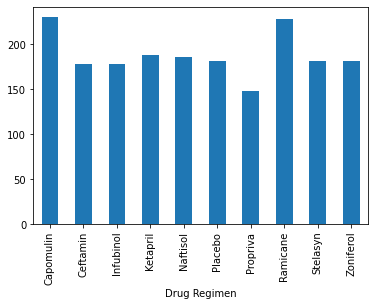

In [7]:
mouse_study_by_drug_full = clean_mouse_study.groupby(["Drug Regimen"])
mouse_study_by_drug_full_counts = mouse_study_by_drug_full.count()

pandas_drug_plot = mouse_study_by_drug_full_counts["Timepoint"].plot(kind = "bar")

# Formats!

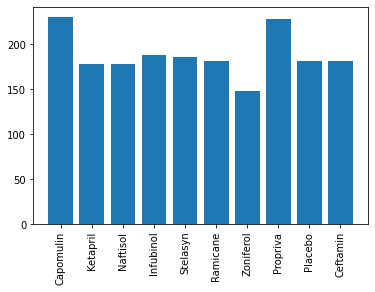

In [8]:
x_axis =  np.arange(len(mouse_study_by_drug_full["Drug Regimen"].unique()))
y_axis = mouse_study_by_drug_full_counts["Timepoint"]
x_labels = clean_mouse_study["Drug Regimen"].unique()

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_labels, rotation = "vertical")
plt.bar(x_axis, y_axis,)

# Formats!

plt.show()

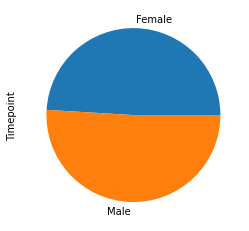

In [9]:
sex_mice_data = clean_mouse_study.groupby(["Sex"])
sex_mice_data_counts = sex_mice_data.count()

pandas_sex_plot = sex_mice_data_counts["Timepoint"].plot(kind = "pie")

# Formats!

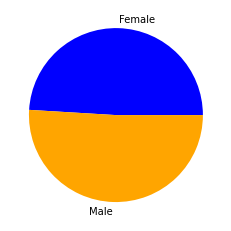

In [10]:
sex_labels = ["Female", "Male"]
sex_sizes = sex_mice_data_counts["Timepoint"]
sex_colors = ["blue", "orange"]

plt.pie(sex_sizes, labels = sex_labels, colors = sex_colors)

# Formats!

plt.show()

# Quartiles!

In [11]:
mouse_data_by_mouseID = clean_mouse_study.groupby(["Mouse ID"])
max_timepoints = mouse_data_by_mouseID["Timepoint"].max()

max_timepoint_mouse_data = pd.merge(clean_mouse_study, max_timepoints, how = "right", on = ["Mouse ID", "Timepoint"])

max_timepoint_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [12]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
max_tumors = []

for drug in treatments:
    max_vol_per_drug_all = max_timepoint_mouse_data.loc[max_timepoint_mouse_data["Drug Regimen"] == drug]
    max_vol_per_drug = max_vol_per_drug_all["Tumor Volume (mm3)"]
    max_tumors.append(max_vol_per_drug)

    quartiles = max_vol_per_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outlier_conditional = (max_vol_per_drug_all["Tumor Volume (mm3)"] < lower_bound) | (max_vol_per_drug_all["Tumor Volume (mm3)"] > upper_bound)
    outliers = max_vol_per_drug_all.loc[outlier_conditional]

    if len(outliers) > 0:
        print(f"{drug}'s possible outliers:")
        print(outliers)
    else:
        print(f"{drug}: No possible outliers found.")

Capomulin: No possible outliers found.
Ramicane: No possible outliers found.
Infubinol's possible outliers:
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
29     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
29  Female          18          25  
Ceftamin: No possible outliers found.


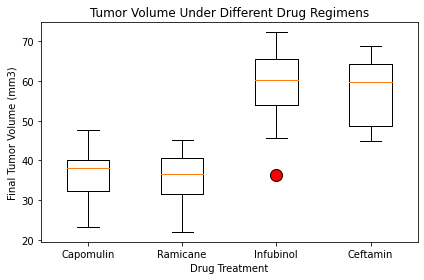

In [88]:
flierprops = dict(marker='o', markerfacecolor='red', markersize=12)

fig1, ax1 = plt.subplots()
ax1.boxplot(max_tumors, labels = treatments, flierprops = flierprops)

ax1.set_title("Tumor Volume Under Different Drug Regimens")
ax1.set_xlabel("Drug Treatment")
ax1.set_ylabel("Final Tumor Volume (mm3)")

plt.tight_layout()
plt.show()

In [20]:
tumor_vol_capomulin_b128 = clean_mouse_study.loc[(clean_mouse_study["Drug Regimen"] == "Capomulin") & (clean_mouse_study["Mouse ID"] == "b128")]
tumor_vol_capomulin_b128

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


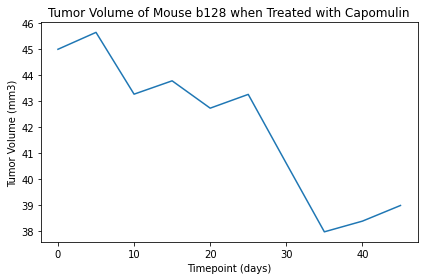

In [81]:
tumor_vol_cap_b128_line = tumor_vol_capomulin_b128["Tumor Volume (mm3)"]
time_cap_128_line = tumor_vol_capomulin_b128["Timepoint"]

fig2, ax2 = plt.subplots()
ax2.plot(time_cap_128_line, tumor_vol_cap_b128_line)

ax2.set_title("Tumor Volume of Mouse b128 when Treated with Capomulin")
ax2.set_xlabel("Timepoint (days)")
ax2.set_ylabel("Tumor Volume (mm3)")

plt.tight_layout()
plt.show()

In [31]:
mouse_data_capomulin = clean_mouse_study.loc[(clean_mouse_study["Drug Regimen"] == "Capomulin")]
mouse_data_cap_byMouse = mouse_data_capomulin.groupby(["Mouse ID"])
mouse_data_cap_byMouse_avg = mouse_data_cap_byMouse.mean()
mouse_data_cap_byMouse_avg

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


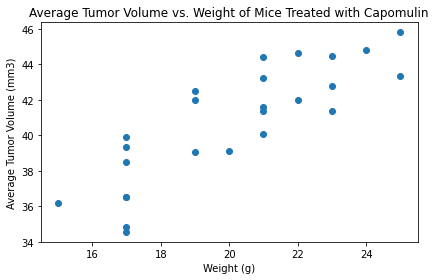

In [50]:
weights_cap_avg = mouse_data_cap_byMouse_avg["Weight (g)"]
tumor_vol_cap_avg = mouse_data_cap_byMouse_avg["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.scatter(weights_cap_avg, tumor_vol_cap_avg)
ax1.set_title("Average Tumor Volume vs. Weight of Mice Treated with Capomulin")
ax1.set_xlabel("Weight (g)")
ax1.set_ylabel("Average Tumor Volume (mm3)")

# FORMAT!
plt.tight_layout()
plt.show()

In [38]:
correlation = st.pearsonr(weights_cap_avg, tumor_vol_cap_avg)
print(f"The correlation between average mouse weight and average tumor volume of mice treated with Capomulin is {round(correlation[0], 2)}.")

The correlation between average mouse weight and average tumor volume of mice treated with Capomulin is 0.84.


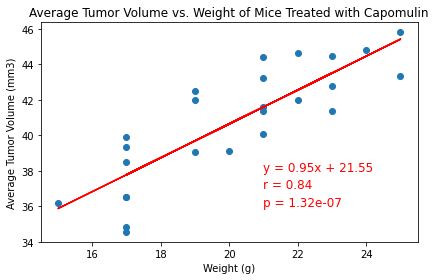

In [77]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weights_cap_avg, tumor_vol_cap_avg)
line_regress_y = (slope * weights_cap_avg) + intercept
line_regress_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots()
ax1.scatter(weights_cap_avg, tumor_vol_cap_avg)
ax1.plot(weights_cap_avg, line_regress_y, 'r')

ax1.set_title("Average Tumor Volume vs. Weight of Mice Treated with Capomulin")
ax1.set_xlabel("Weight (g)")
ax1.set_ylabel("Average Tumor Volume (mm3)")

ax1.annotate(line_regress_eq, (21,38), color = "red", fontsize = 12)
ax1.annotate("r = " + str(round(rvalue, 2)), (21,37), color = "red", fontsize = 12)
ax1.annotate("p = " + "{:.2e}".format(pvalue), (21,36), color = "red", fontsize = 12)

plt.tight_layout()
plt.show()